In [61]:
import pandas as pd
import matplotlib.pyplot as plt


In [62]:
# Orthogroups.tsv dosyasını oku
df = pd.read_csv('../resource/Proteome/OrthoFinder/Results_Feb22/Orthogroups/Orthogroups.tsv', sep='\t')

In [63]:
# Türe özgü ve korunmuş ortogrupları saklamak için sözlükler
species_specific = {'H_meleagridis_aa': [], 'T_foetus_aa': [], 'T_vaginalis_aa': []}
conserved = []

In [64]:
# Her ortogrup için tür varlığını kontrol et
for index, row in df.iterrows():
    species_counts = {species: pd.notna(row[species]) for species in ['H_meleagridis_aa', 'T_foetus_aa', 'T_vaginalis_aa']}
    present_species = [species for species, present in species_counts.items() if present]

    # Eğer sadece bir türde gen varsa, bu türe özgüdür
    if len(present_species) == 1:
        species_specific[present_species[0]].append(row['Orthogroup'])
    # Eğer tüm türlerde genler varsa, bu korunmuştur
    elif len(present_species) == len(species_counts):
        conserved.append(row['Orthogroup'])

In [65]:
# Sonuçları yazdır
print("Türe Özgü Ortogruplar:")
for species, groups in species_specific.items():
    print(f"{species}: {len(groups)} ortogrup")

Türe Özgü Ortogruplar:
H_meleagridis_aa: 357 ortogrup
T_foetus_aa: 1465 ortogrup
T_vaginalis_aa: 2249 ortogrup


In [66]:
print("\nKorunmuş Ortogruplar:")
print(f"Toplam: {len(conserved)} ortogrup")


Korunmuş Ortogruplar:
Toplam: 4537 ortogrup


In [67]:
# Örnek veriler
species_specific_counts = [len(groups) for groups in species_specific.values()]
conserved_count = len(conserved)
labels = ['H_meleagridis_aa', 'T_foetus_aa', 'T_vaginalis_aa', 'Korunmuş']

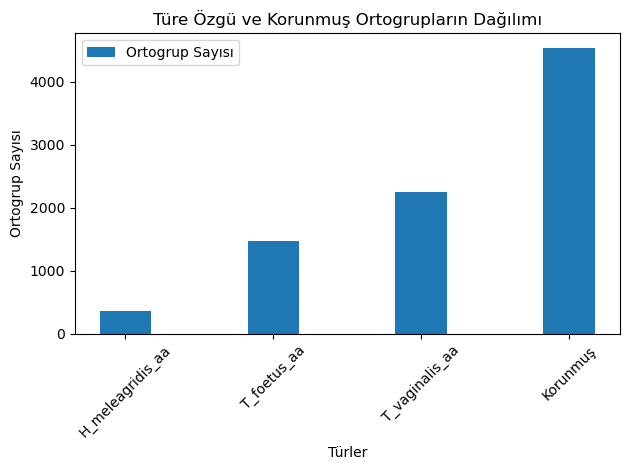

In [68]:
# Çubuk grafik genişlikleri
bar_width = 0.35

# Grafik pozisyonları
index = range(len(labels))

# Çubuk grafik oluşturma
plt.bar(index, species_specific_counts + [conserved_count], bar_width, label='Ortogrup Sayısı')

# Eksen etiketleri, başlık ve özel ayarlar
plt.xlabel('Türler')
plt.ylabel('Ortogrup Sayısı')
plt.title('Türe Özgü ve Korunmuş Ortogrupların Dağılımı')
plt.xticks(index, labels, rotation=45)
plt.legend()

# Görselleştirmeyi göster
plt.tight_layout()
plt.show()

In [69]:



# Her bir türe özgü çubuğun üstüne eklenecek korunmuş ortogrup sayısı
conserved_counts = [conserved_count] * len(species_specific_counts)

In [71]:
plt.style.use("default")

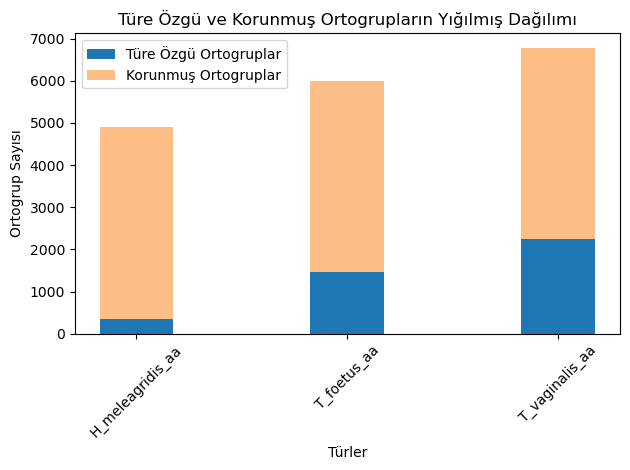

In [73]:
# Tür etiketleri (Korunmuş etiketi kaldırıldı)
labels = ['H_meleagridis_aa', 'T_foetus_aa', 'T_vaginalis_aa']

# Çubuk grafik genişlikleri
bar_width = 0.35

# Grafik pozisyonları (Korunmuş etiketi kaldırıldıktan sonra güncellendi)
index = range(len(labels))

# İlk çubukları (türe özgü ortogruplar) oluşturma
plt.bar(index, species_specific_counts, bar_width, label='Türe Özgü Ortogruplar')

# İkinci çubukları (korunmuş ortogruplar) oluşturma (Her bir türe özgü çubuğun üstüne eklenecek)
plt.bar(index, conserved_counts, bar_width, bottom=species_specific_counts, label='Korunmuş Ortogruplar', alpha=0.5)

# Eksen etiketleri, başlık ve özel ayarlar
plt.xlabel('Türler')
plt.ylabel('Ortogrup Sayısı')
plt.title('Türe Özgü ve Korunmuş Ortogrupların Yığılmış Dağılımı')
plt.xticks(index, labels, rotation=45)
plt.legend()

# Görselleştirmeyi göster
plt.tight_layout()
plt.savefig(f"ture_ozgu_ve_korunmus_orthogruplar.png", transparent=True)
plt.show()


In [ ]:
# Her hücredeki gen sayısını hesapla (genler virgülle ayrılmış)
for col in df.columns:
    df[col] = df[col].str.count(',') + 1
df.fillna(0, inplace=True)  # NaN değerlerini 0 ile doldur

In [ ]:
stacked_data = df.cumsum(axis=0)


In [ ]:
stacked_data.tail()

,Orthogroup,H_meleagridis_aa,T_foetus_aa,T_vaginalis_aa
12037,12038,9586.0,18040.0,64268.0
12038,12039,9586.0,18040.0,64270.0
12039,12040,9586.0,18040.0,64272.0
12040,12041,9586.0,18040.0,64274.0
12041,12042,9586.0,18040.0,64276.0


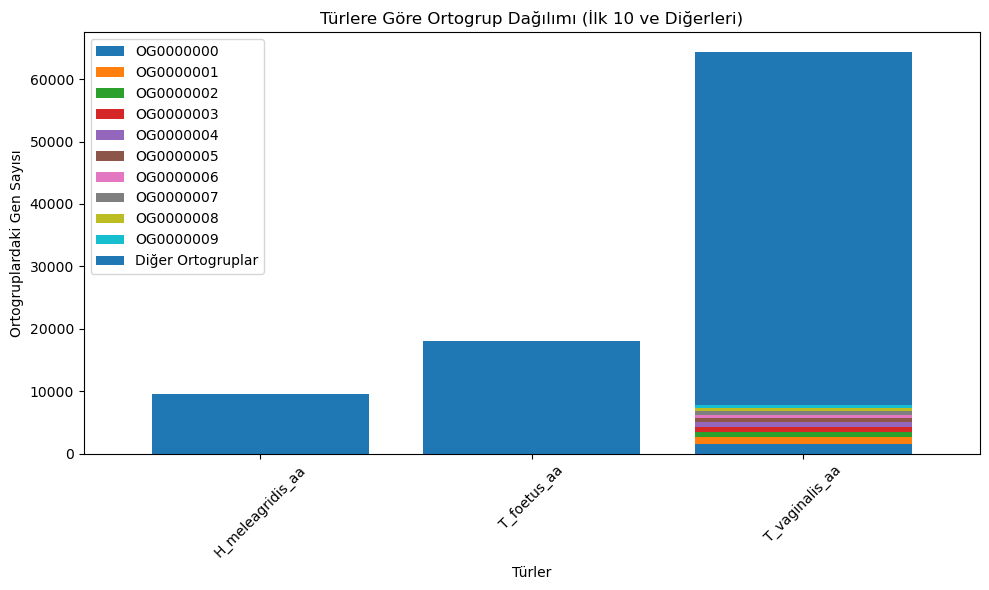

In [ ]:
# İlk 10 ortogrup için verileri sakla ve kalanlar için topla
top_10 = df.iloc[:10]  # İlk 10 ortogrup
rest = df.iloc[10:].sum(axis=0).to_frame().T  # 11. ortogruptan sonrakilerin toplamı

# 'Diğer Ortogruplar' olarak adlandırılan yeni bir satır ekle
rest.index = ['Diğer Ortogruplar']

# Top_10 ve rest DataFrame'lerini birleştir
combined = pd.concat([top_10, rest])

# Yığılmış sütun grafik oluştur
ax = combined.T.plot(kind='bar', stacked=True, figsize=(10, 6), width=0.8)

# Eksen etiketleri ve başlık
ax.set_xlabel('Türler')
ax.set_ylabel('Ortogruplardaki Gen Sayısı')
ax.set_title('Türlere Göre Ortogrup Dağılımı (İlk 10 ve Diğerleri)')

# Görselleştirme
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()